In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [7]:
X_train = X_train / 255
X_test = X_test / 255

In [8]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [9]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2908 - accuracy: 0.9194
Epoch 2/5
1875/1875 [==============================] - 2s 898us/step - loss: 0.1341 - accuracy: 0.9607
Epoch 3/5
1875/1875 [==============================] - 2s 883us/step - loss: 0.0987 - accuracy: 0.9706
Epoch 4/5
1875/1875 [==============================] - 2s 929us/step - loss: 0.0764 - accuracy: 0.9768
Epoch 5/5
1875/1875 [==============================] - 2s 911us/step - loss: 0.0617 - accuracy: 0.9817


In [10]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 660us/step - loss: 0.0894 - accuracy: 0.9720


[0.08940980583429337, 0.972000002861023]

Text(69.0, 0.5, 'Truth')

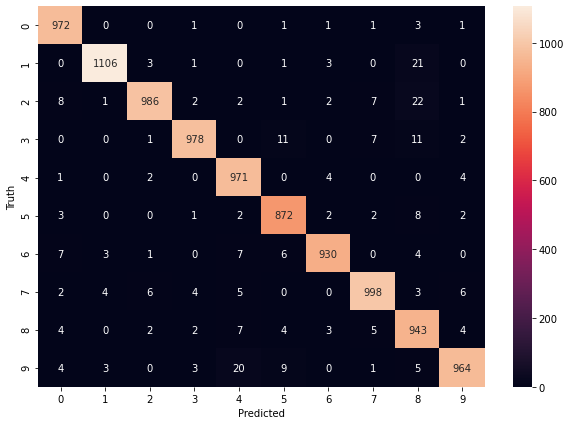

In [11]:
import seaborn as sn
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [12]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([5.8539285e-07, 3.8568704e-10, 8.2186619e-07, 1.5589595e-04,
       1.6675311e-09, 2.8590290e-07, 7.0108230e-10, 8.8721502e-01,
       3.2345442e-06, 1.0995363e-04], dtype=float32)

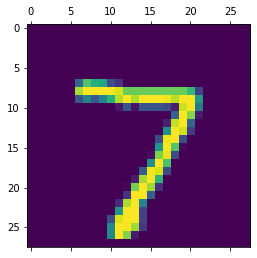

In [13]:
plt.matshow(X_test[0])

In [14]:
np.argmax(y_predicted[0])

7